# Customer Churn Prediction and Analysis - Milestone 1

## Introduction

In business domain, one of the biggest challenges any company faces is retaining its existing customers. "Churn" means when a customer leaves a company and no longer uses its services or products. Customer Churn Prediction and Analysis aims to identify customers who are likely to churn before they do so, and take smart steps to keep them coming back.

## Project Idea

The project relies on analyzing customer data using data science and machine learning techniques to predict which customers are at risk of leaving the company. Based on this prediction, we can take proactive measures, such as special offers or direct communication, to retain them.

## Milestone stages

- Data Collection
- Data Exploration
- Data Preprocessing
- Exploratory Data Analysis (EDA)
- Results

## Task 1: Data Collection

in this project we use Telco Customer Churn Dataset IBM from kaggle
 
Link: 

### import packages and dataset

In [78]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer,StandardScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipline
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print (df.shape)
print (df.columns)

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### Column Descriptions – Telco Customer Churn Dataset

| Column Name         | Description |
|---------------------|-------------|
| `customerID`        | Unique identifier for each customer. |
| `gender`            | Gender of the customer (`Male` or `Female`). |
| `SeniorCitizen`     | Indicates if the customer is a senior citizen (1 = Yes, 0 = No). |
| `Partner`           | Whether the customer has a partner (`Yes` or `No`). |
| `Dependents`        | Whether the customer has dependents (`Yes` or `No`). |
| `tenure`            | Number of months the customer has stayed with the company. |
| `PhoneService`      | Whether the customer has a phone service. |
| `MultipleLines`     | Whether the customer has multiple phone lines. |
| `InternetService`   | Type of internet service (`DSL`, `Fiber optic`, `No`). |
| `OnlineSecurity`    | Whether the customer has online security add-on. |
| `OnlineBackup`      | Whether the customer has online backup service. |
| `DeviceProtection`  | Whether the customer has device protection service. |
| `TechSupport`       | Whether the customer has tech support subscription. |
| `StreamingTV`       | Whether the customer has a streaming TV service. |
| `StreamingMovies`   | Whether the customer has a streaming movies service. |
| `Contract`          | Type of customer contract (`Month-to-month`, `One year`, `Two year`). |
| `PaperlessBilling`  | Whether the customer uses paperless billing (`Yes` or `No`). |
| `PaymentMethod`     | Payment method (`Electronic check`, `Mailed check`, etc.). |
| `MonthlyCharges`    | Amount charged to the customer monthly. |
| `TotalCharges`      | Total amount charged to the customer. |
| `Churn`             | Whether the customer churned (left the company) (`Yes` or `No`). |


## Task 2: Data Exploration

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [80]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"{col} ({len(unique_vals)} unique): {unique_vals[:10]} {'...' if len(unique_vals) > 10 else ''}\n")


customerID (7043 unique): ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU'] ...

gender (2 unique): ['Female' 'Male'] 

SeniorCitizen (2 unique): [0 1] 

Partner (2 unique): ['Yes' 'No'] 

Dependents (2 unique): ['No' 'Yes'] 

tenure (73 unique): [ 1 34  2 45  8 22 10 28 62 13] ...

PhoneService (2 unique): ['No' 'Yes'] 

MultipleLines (3 unique): ['No phone service' 'No' 'Yes'] 

InternetService (3 unique): ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity (3 unique): ['No' 'Yes' 'No internet service'] 

OnlineBackup (3 unique): ['Yes' 'No' 'No internet service'] 

DeviceProtection (3 unique): ['No' 'Yes' 'No internet service'] 

TechSupport (3 unique): ['No' 'Yes' 'No internet service'] 

StreamingTV (3 unique): ['No' 'Yes' 'No internet service'] 

StreamingMovies (3 unique): ['No' 'Yes' 'No internet service'] 

Contract (3 unique): ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling (2 unique): ['Ye

| Column Name         | Unique Values Count | Sample Unique Values                                       | Type            |
|---------------------|---------------------|-------------------------------------------------------------|------------------|
| `customerID`        | 7043                | `['7590-VHVEG', '5575-GNVDE', ...]`                         | ID (to drop)     |
| `gender`            | 2                   | `['Female', 'Male']`                                       | Categorical      |
| `SeniorCitizen`     | 2                   | `[0, 1]`                                                    | Binary Numeric   |
| `Partner`           | 2                   | `['Yes', 'No']`                                            | Categorical      |
| `Dependents`        | 2                   | `['No', 'Yes']`                                            | Categorical      |
| `tenure`            | 73                  | `[1, 34, 2, 45, 8, ...]`                                   | Numerical        |
| `PhoneService`      | 2                   | `['No', 'Yes']`                                            | Categorical      |
| `MultipleLines`     | 3                   | `['No phone service', 'No', 'Yes']`                        | Categorical  |
| `InternetService`   | 3                   | `['DSL', 'Fiber optic', 'No']`                             | Categorical      |
| `OnlineSecurity`    | 3                   | `['No', 'Yes', 'No internet service']`                     | Categorical  |
| `OnlineBackup`      | 3                   | `['Yes', 'No', 'No internet service']`                     | Categorical  |
| `DeviceProtection`  | 3                   | `['No', 'Yes', 'No internet service']`                     | Categorical  |
| `TechSupport`       | 3                   | `['No', 'Yes', 'No internet service']`                     | Categorical  |
| `StreamingTV`       | 3                   | `['No', 'Yes', 'No internet service']`                     | Categorical  |
| `StreamingMovies`   | 3                   | `['No', 'Yes', 'No internet service']`                     | Categorical  |
| `Contract`          | 3                   | `['Month-to-month', 'One year', 'Two year']`               | Categorical      |
| `PaperlessBilling`  | 2                   | `['Yes', 'No']`                                            | Categorical      |
| `PaymentMethod`     | 4                   | `['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'] ` | Categorical |
| `MonthlyCharges`    | 1585                | `[29.85, 56.95, 53.85, ...]`                               | Numerical        |
| `TotalCharges`      | 6531                | `['29.85', '1889.5', '108.15', ...]`                       | categorical (float) |
| `Churn`             | 2                   | `['No', 'Yes']`                                            | Target Variable  |

Number of rows and columns:

- It has 7,043 rows (meaning 7,043 customers).

- 21 columns containing all the basic information (personal data, subscription, internet, bills, and a Churn column for categorization).

The data is initially clean:

- There are no missing values ​​in any column (especially TotalCharges, which sometimes causes problems).

- There are no duplicate rows (Duplicates = 0), which is excellent.

The data is diverse:

- It has categorical data such as gender, paymentmethod, contract, and others.

- It has numerical data such as MonthlyCharges, TotalCharges, and tenure.

Target column:

- The Churn column is present and determines whether a customer has left or not. This is what we will use as a label.

In [81]:
df.iloc[:,:10].head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [82]:
df.iloc[:,10:].head()

OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         Contract PaperlessBilling              PaymentMethod  MonthlyCharges  \
0  Month-to-month              Yes           Electronic check           29.85   
1        One year               No               Mailed check           56.95   
2  Month-to-month              Yes               Mailed check           53.85   
3        One year               No  Bank transfer (automatic)           42.30   
4  Month-to-month              Yes           Electronic check           70.70   

  TotalCharges Churn  
0        29.85    No  
1       1889.5    No  
2       108.15   Yes  
3      1840.75    No  
4       151.65   Yes

In [83]:
df.describe(include='object')

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     3186-AJIEK   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check         20.2    No  
freq               4171              2365           11  5174

In [84]:
df.describe(include='number')

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [85]:
#Handling the data type of totalcharges from object to number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [86]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [87]:
duplicates = df.duplicated()
print("number of duplicates:", duplicates.sum())

number of duplicates: 0


In [88]:
# rows that TotalCharges = NaN
df[df['TotalCharges'].isna()]


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

## Task 3.1: Preprocessing 

### replace 

In several features like OnlineSecurity or TechSupport, values include “Yes”, “No”, and “No internet service”. “Yes” means the customer has internet and is subscribed. “No” means they have internet but are not subscribed. “No internet service” means the customer doesn’t have internet at all. For modeling purposes, it’s common to replace “No internet service” with “No”.

then We convert to the same value, because those who do not have internet are naturally not subscribed to the service = the same result = "No"

In [89]:
# Get the number of rows before removing missing values
original_count = df.shape[0]

# Drop rows where 'TotalCharges' is missing (NaN)
df_cleaned = df.dropna(subset=['TotalCharges']).copy()

# Drop the customerID column (not useful for modeling)
if 'customerID' in df_cleaned.columns:
    df_cleaned.drop('customerID', axis=1, inplace=True)

# Get the number of rows after cleaning
cleaned_count = df_cleaned.shape[0]

# Calculate how many rows were removed
removed_rows = original_count - cleaned_count

# Display the results
print("Number of rows before removal:", original_count)
print("Number of rows after removal:", cleaned_count)
print("Number of rows removed:", removed_rows)

Number of rows before removal: 7043
Number of rows after removal: 7032
Number of rows removed: 11


In [ ]:
# Internet-related service columns only
internet_features = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies','MultipleLines'
]

# Replace "No internet service" & "No phone service" with "No" in these columns
for col in internet_features:
    df_cleaned[col] = df_cleaned[col].replace('No internet service', 'No')
    df_cleaned[col] = df_cleaned[col].replace('No phone service', 'No')

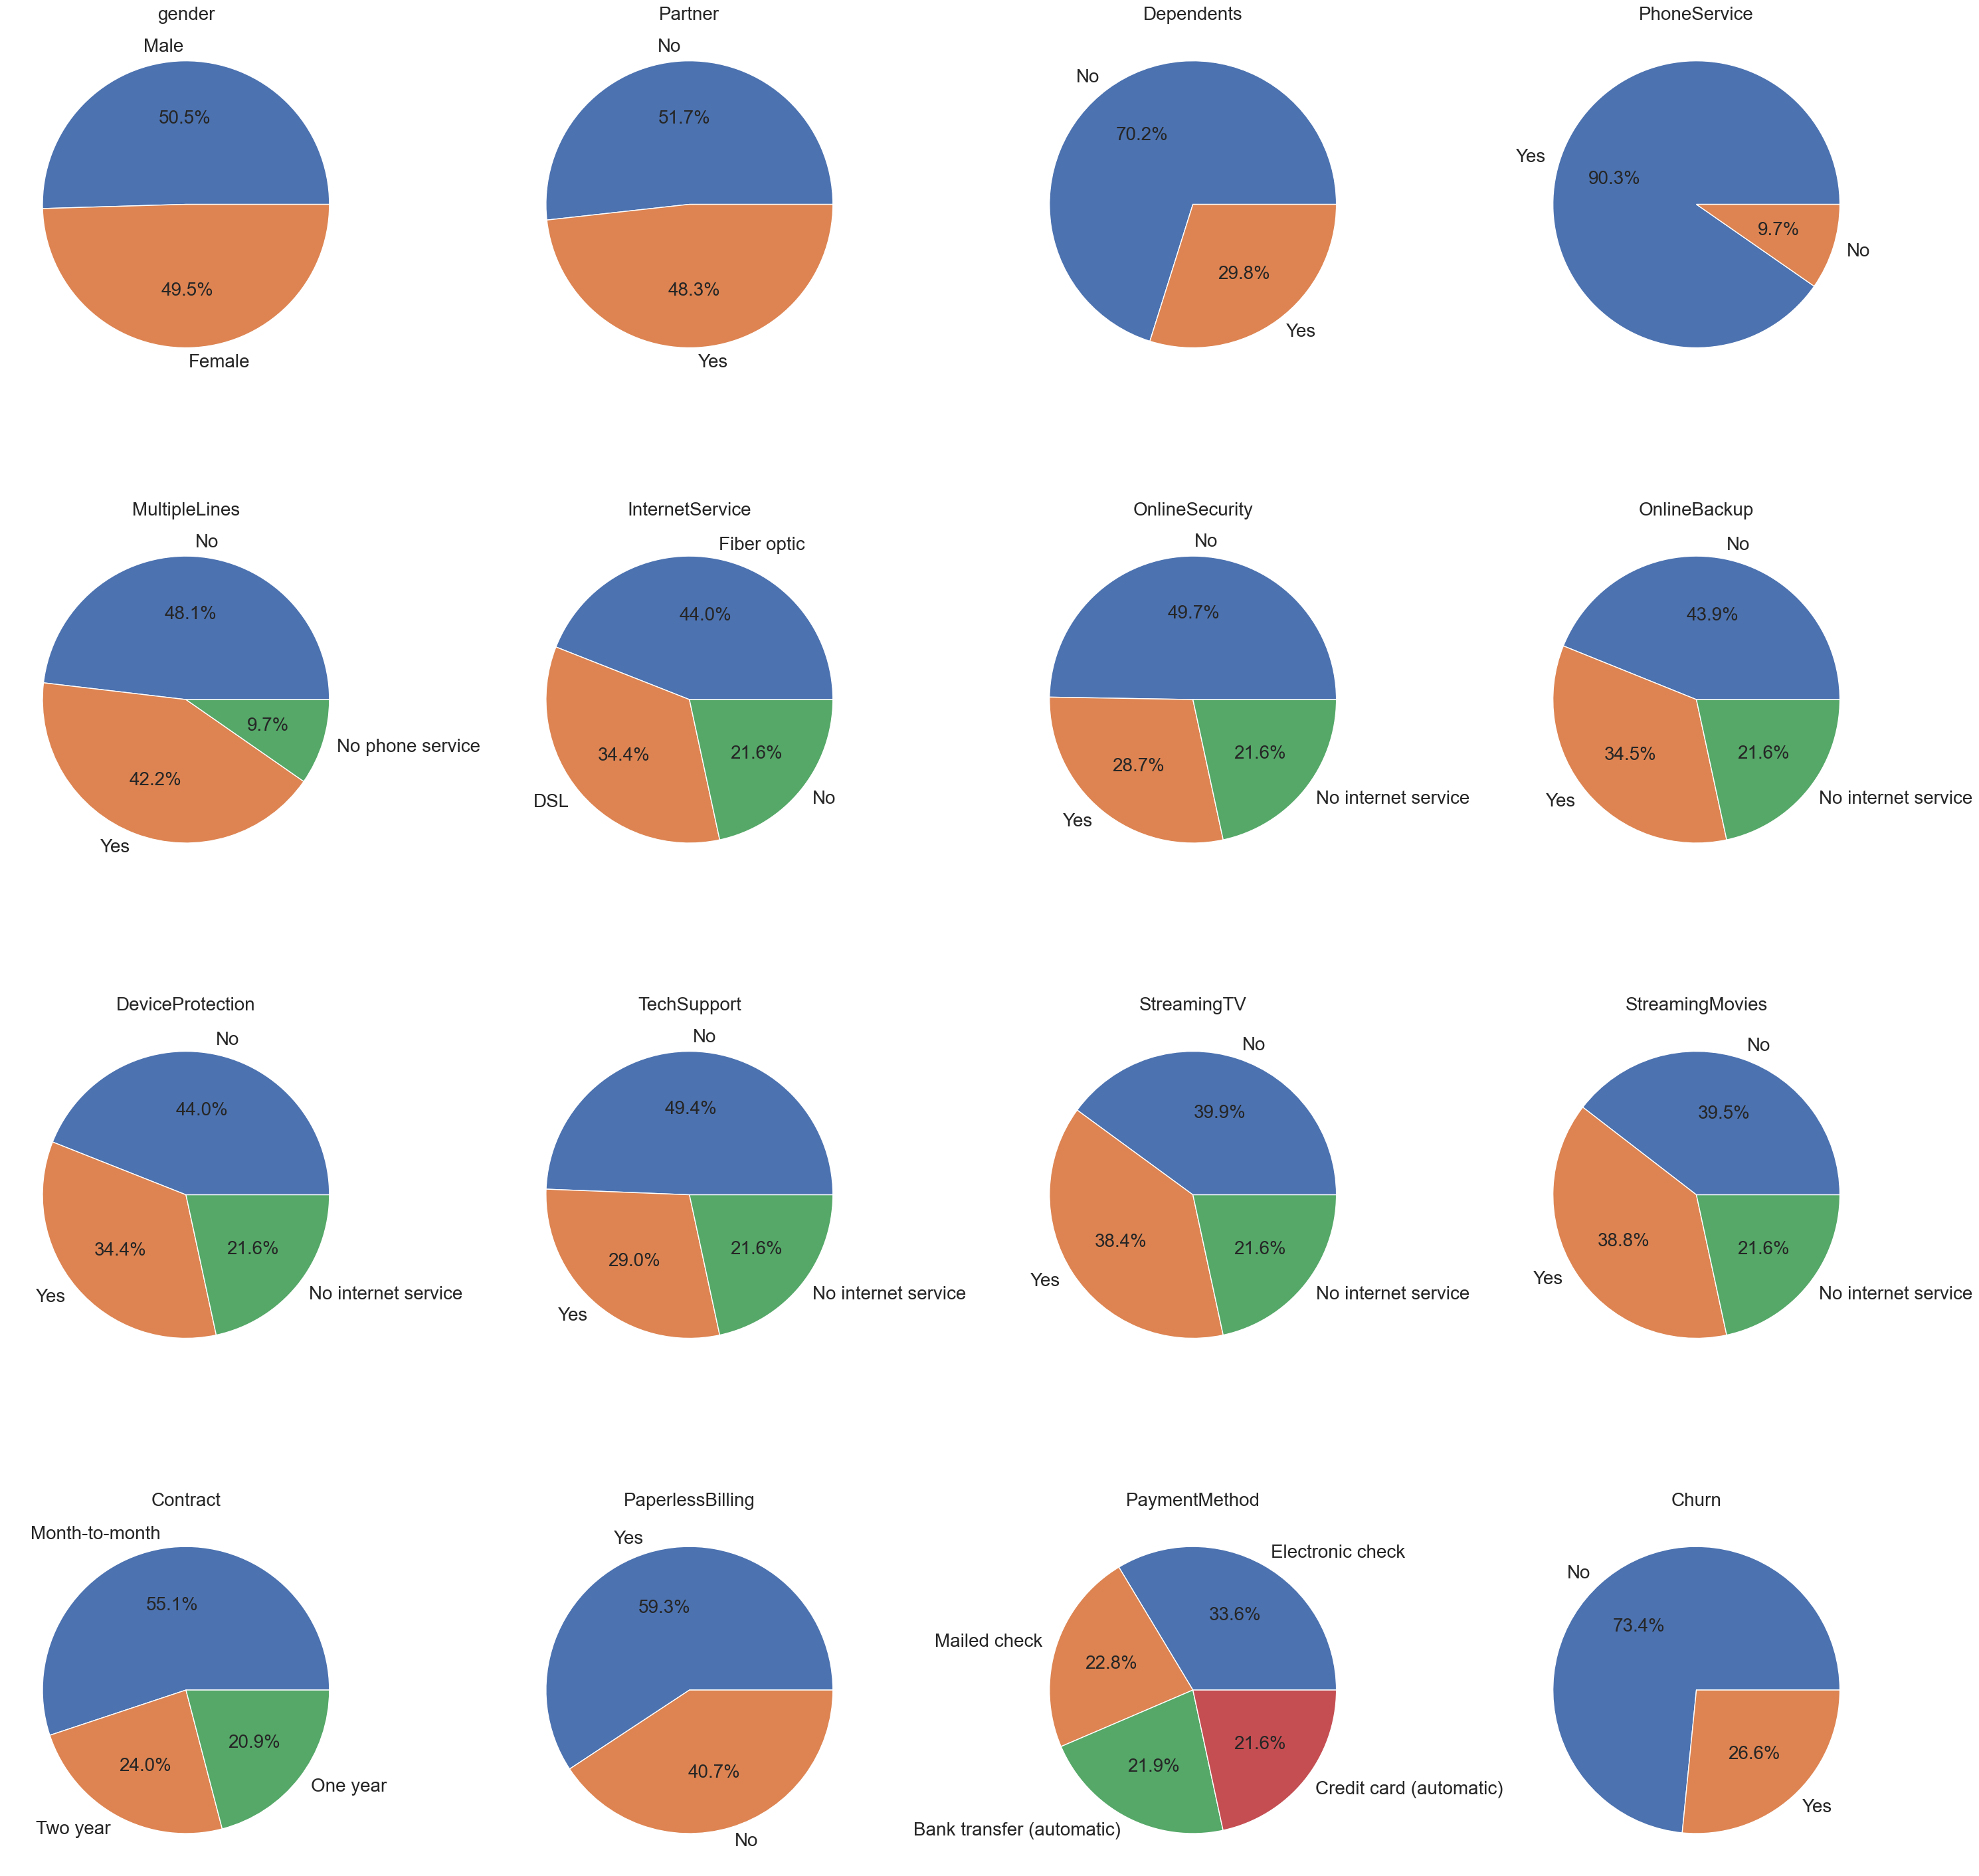

In [90]:
fig, axes = plt.subplots(4, 4, figsize=(30, 30))  
axes = axes.flatten() 

for i, col in enumerate(df_cleaned.select_dtypes(include='O').columns):
    ax = axes[i]
    data = df_cleaned[col].value_counts()
    labels = data.index
    ax.pie(data, labels=labels, autopct='%1.1f%%',textprops={'fontsize': 20})
    ax.set_title(col,fontsize=20)
plt.tight_layout()
plt.show()


In [91]:
cat_columns=df_cleaned.select_dtypes(include='O')
num_columns = df_cleaned.select_dtypes(include='number')

In [92]:

df_cleaned['Churn_num'] = df_cleaned['Churn'].map({'Yes':1,'No':0})

In [93]:
for col in df_cleaned.columns:
    unique_vals = df_cleaned[col].unique()
    print(f"{col} ({len(unique_vals)} unique): {unique_vals[:10]} {'...' if len(unique_vals) > 10 else ''}\n")


gender (2 unique): ['Female' 'Male'] 

SeniorCitizen (2 unique): [0 1] 

Partner (2 unique): ['Yes' 'No'] 

Dependents (2 unique): ['No' 'Yes'] 

tenure (72 unique): [ 1 34  2 45  8 22 10 28 62 13] ...

PhoneService (2 unique): ['No' 'Yes'] 

MultipleLines (3 unique): ['No phone service' 'No' 'Yes'] 

InternetService (3 unique): ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity (3 unique): ['No' 'Yes' 'No internet service'] 

OnlineBackup (3 unique): ['Yes' 'No' 'No internet service'] 

DeviceProtection (3 unique): ['No' 'Yes' 'No internet service'] 

TechSupport (3 unique): ['No' 'Yes' 'No internet service'] 

StreamingTV (3 unique): ['No' 'Yes' 'No internet service'] 

StreamingMovies (3 unique): ['No' 'Yes' 'No internet service'] 

Contract (3 unique): ['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling (2 unique): ['Yes' 'No'] 

PaymentMethod (4 unique): ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges (1584 unique): [ 29

save new dataset

In [94]:
# Save the final cleaned and engineered dataset
df_cleaned.to_csv("cleaned_churn_data.csv", index=False)

## Task 4: Exploratory Data Analysis (EDA)

In [95]:
# Load the cleaned dataset
df_cleaned2 = pd.read_csv("cleaned_churn_data.csv")
# Set seaborn style
sns.set(style="whitegrid")


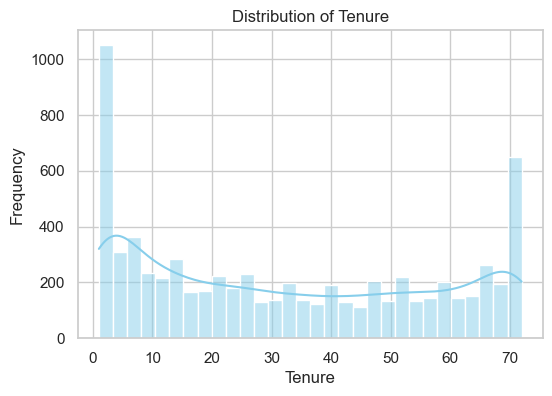

In [96]:
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned2['tenure'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()


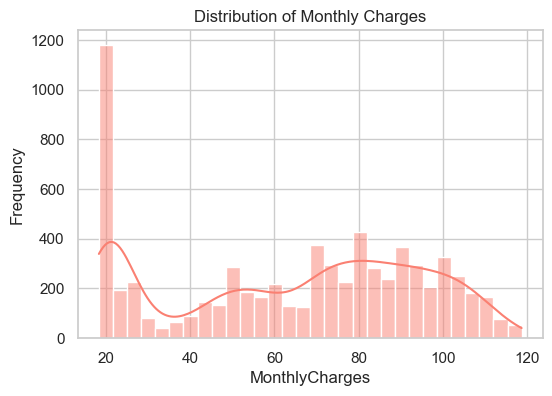

In [97]:
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned2['MonthlyCharges'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.show()


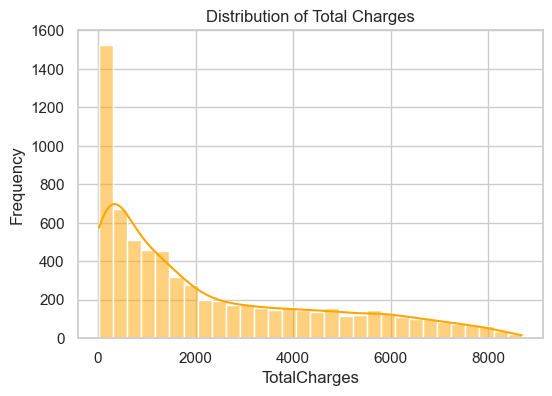

In [98]:
plt.figure(figsize=(6, 4))
sns.histplot(df_cleaned2['TotalCharges'], kde=True, bins=30, color='orange')
plt.title('Distribution of Total Charges')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.show()


C:\Users\AmrKhaled\AppData\Local\Temp\ipykernel_8188\1050105687.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




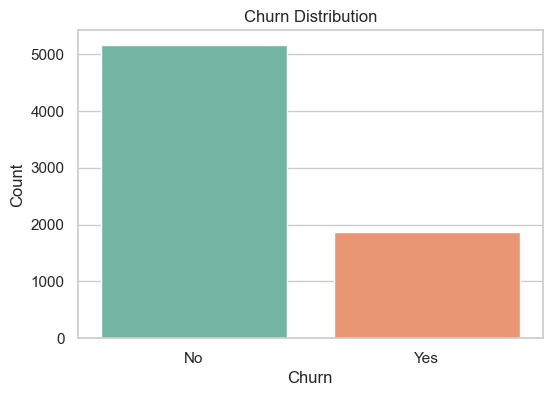

In [99]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned2, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


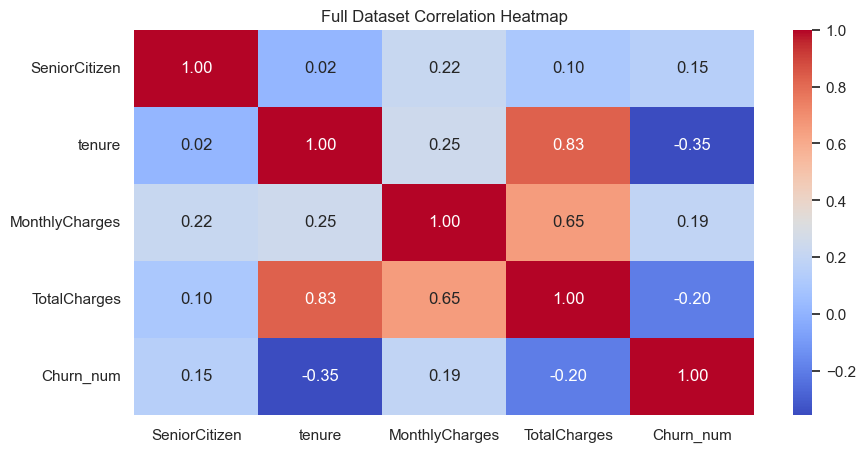

In [100]:
# Generate full correlation heatmap for all numeric columns
plt.figure(figsize=(10, 5))

# Calculate correlation matrix
full_corr = df_cleaned2.select_dtypes(include='number').corr()

# Plot the heatmap
sns.heatmap(full_corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Full Dataset Correlation Heatmap")
plt.show()

# Milestone 2: Advanced Data Analysis and Feature Engineering

## Milestone Stages:
- Advanced Data Analysis
+ Advanced Feature Engineering
- More Data Visualization

## Violin Plot
We used a Violin Plot to analyze the distribution of subscription tenure between customers who left and those who remained. The results showed that customers who left tended to have shorter subscription tenures, while those who remained tended to have longer subscription tenures. This suggests that subscription tenure can be an important indicator of customer churn.

C:\Users\AmrKhaled\AppData\Local\Temp\ipykernel_8188\2552909970.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




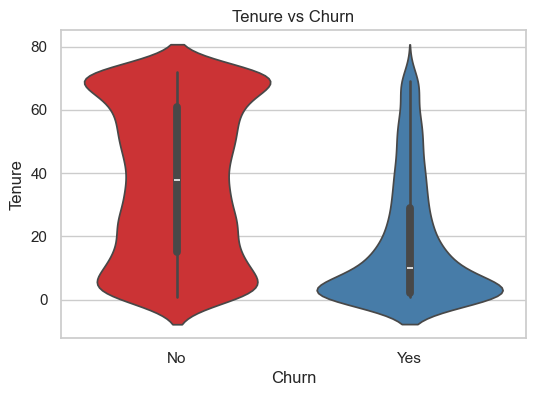

In [101]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df_cleaned2, x='Churn', y='tenure', palette='Set1')
plt.title('Tenure vs Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()


## relationship between the customer's state (Churn) and others

We use the Plotly Express library to draw Box Plots to analyze the relationship between the customer's state (Churn) and some numeric variables.

In [102]:
px.box(df_cleaned2,x='Churn',y='MonthlyCharges',color='Churn',title='MonthlyCharges vs Churn',height=500).show()
px.box(df_cleaned2,x='Churn',y='tenure', color='Churn', title='tenure vs Churn', height=500).show()
px.box(df_cleaned2,x='Churn',y='TotalCharges', color='Churn', title='TotalCharges vs churn', height=500).show()

Box plots were used to analyze the relationship between customer status (Churn) and several numeric variables (MonthlyCharges, Tenure, TotalCharges). The analysis showed that customers with higher monthly payments or shorter subscription terms were more likely to churn. These findings help identify factors influencing customer churn and take proactive measures to retain them.

In [103]:
px.scatter(df_cleaned2, x='tenure', y='MonthlyCharges', color='Churn', title="Tenure vs Monthly Charges").show()

## more Bar Plots

Bar plots were used to analyze the relationship between categorical variables and average monthly charges (MonthlyCharges) for customer status (Churn). The analysis showed that certain categories within categorical variables exhibited significant differences in average MonthlyCharges between customers who left and those who remained. The red line in each graph shows the overall average MonthlyCharges, which helps compare averages within different categories. These results help identify categories that may be at greater risk of churn and take proactive measures to retain them.

In [104]:
for col in df_cleaned2.columns:
    px.histogram(df_cleaned2, x=col, color='Churn', title=f"Distribution of {col} by Churn", barmode="group").show()

## Feature Engineering

### One-hot encoding for categorical data and Scaling fro numerical data

In [105]:
# One-hot encoding
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))
])


# Regular scaler
num_pipeline = Pipeline([
    ('scaler', RobustScaler())
])

Determine the names of the columns to which we will apply pre-processing operations, whether it is encoding for categorical data or scaling for numerical data.

In [106]:
ohe_cat_columns = df_cleaned2.select_dtypes(include='O').drop(columns='Churn').columns.to_list()
scal_num_columns = df_cleaned2.select_dtypes(include='number').drop(columns='Churn_num').columns.to_list()

Create a ColumnTransformer, which allows us to apply different transformations to different columns in the data.

In [107]:
preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, ohe_cat_columns),
    ('scal', num_pipeline,scal_num_columns),
], remainder='passthrough')

In [108]:
X = df_cleaned2.drop(columns=['Churn','Churn_num'])
y = df_cleaned2['Churn_num']

x: now contains all the features we'll use in training, minus the column we're trying to predict (Churn_num) and its text version.

y: Take the Churn_num column alone, which will be the target or variable we want the model to predict.

Transform the data using the preprocessor we created earlier, and then return the transformed data to a DataFrame with the appropriate column names.

In [109]:
# Fit and transform
X_transformed = preprocessor.fit_transform(X)

# Get output feature names
encoded_cols = preprocessor.get_feature_names_out()

# Create DataFrame with correct shape and index
transformed = pd.DataFrame(X_transformed, columns=encoded_cols, index=df_cleaned2.index)
transformed['Churn'] =y

transformed.iloc[:,:15].head()


cat__gender_Male  cat__Partner_Yes  cat__Dependents_Yes  \
0               0.0               1.0                  0.0   
1               1.0               0.0                  0.0   
2               1.0               0.0                  0.0   
3               1.0               0.0                  0.0   
4               0.0               0.0                  0.0   

   cat__PhoneService_Yes  cat__MultipleLines_No phone service  \
0                    0.0                                  1.0   
1                    1.0                                  0.0   
2                    1.0                                  0.0   
3                    0.0                                  1.0   
4                    1.0                                  0.0   

   cat__MultipleLines_Yes  cat__InternetService_Fiber optic  \
0                     0.0                               0.0   
1                     0.0                               0.0   
2                     0.0                               0.0   
3                     0.0                               0.0   
4                     0.0                               1.0   

   cat__InternetService_No  cat__OnlineSecurity_No internet service  \
0                      0.0                                      0.0   
1                      0.0                                      0.0   
2                      0.0                                      0.0   
3                      0.0                                      0.0   
4                      0.0                                      0.0   

   cat__OnlineSecurity_Yes  cat__OnlineBackup_No internet service  \
0                      0.0                                    0.0   
1                      1.0                                    0.0   
2                      1.0                                    0.0   
3                      1.0                                    0.0   
4                      0.0                                    0.0   

   cat__OnlineBackup_Yes  cat__DeviceProtection_No internet service  \
0                    1.0                                        0.0   
1                    0.0                                        0.0   
2                    1.0                                        0.0   
3                    0.0                                        0.0   
4                    0.0                                        0.0   

   cat__DeviceProtection_Yes  cat__TechSupport_No internet service  
0                        0.0                                   0.0  
1                        1.0                                   0.0  
2                        0.0                                   0.0  
3                        1.0                                   0.0  
4                        0.0                                   0.0

In [110]:
transformed.iloc[:,15:].head()

cat__TechSupport_Yes  cat__StreamingTV_No internet service  \
0                   0.0                                   0.0   
1                   0.0                                   0.0   
2                   0.0                                   0.0   
3                   1.0                                   0.0   
4                   0.0                                   0.0   

   cat__StreamingTV_Yes  cat__StreamingMovies_No internet service  \
0                   0.0                                       0.0   
1                   0.0                                       0.0   
2                   0.0                                       0.0   
3                   0.0                                       0.0   
4                   0.0                                       0.0   

   cat__StreamingMovies_Yes  cat__Contract_One year  cat__Contract_Two year  \
0                       0.0                     0.0                     0.0   
1                       0.0                     1.0                     0.0   
2                       0.0                     0.0                     0.0   
3                       0.0                     1.0                     0.0   
4                       0.0                     0.0                     0.0   

   cat__PaperlessBilling_Yes  cat__PaymentMethod_Credit card (automatic)  \
0                        1.0                                         0.0   
1                        0.0                                         0.0   
2                        1.0                                         0.0   
3                        0.0                                         0.0   
4                        1.0                                         0.0   

   cat__PaymentMethod_Electronic check  cat__PaymentMethod_Mailed check  \
0                                  1.0                              0.0   
1                                  0.0                              1.0   
2                                  0.0                              1.0   
3                                  0.0                              0.0   
4                                  1.0                              0.0   

   scal__SeniorCitizen  scal__tenure  scal__MonthlyCharges  \
0                  0.0     -0.608696             -0.746200   
1                  0.0      0.108696             -0.246891   
2                  0.0     -0.586957             -0.304007   
3                  0.0      0.347826             -0.516813   
4                  0.0     -0.586957              0.006449   

   scal__TotalCharges  Churn  
0           -0.403038      0  
1            0.145000      0  
2           -0.379963      1  
3            0.130633      0  
4           -0.367144      1

In [111]:
transformed.to_csv("preprocesd_churn_data.csv", index=False)

Horizontal bar chart showing the strength of the association between each numerical feature and the Churn feature.

A graph was created showing the correlations between the numerical variables and the "Churn" variable. This analysis allows us to identify the features with the strongest influence on customer departure, helping us select the most effective features for training the prediction model.

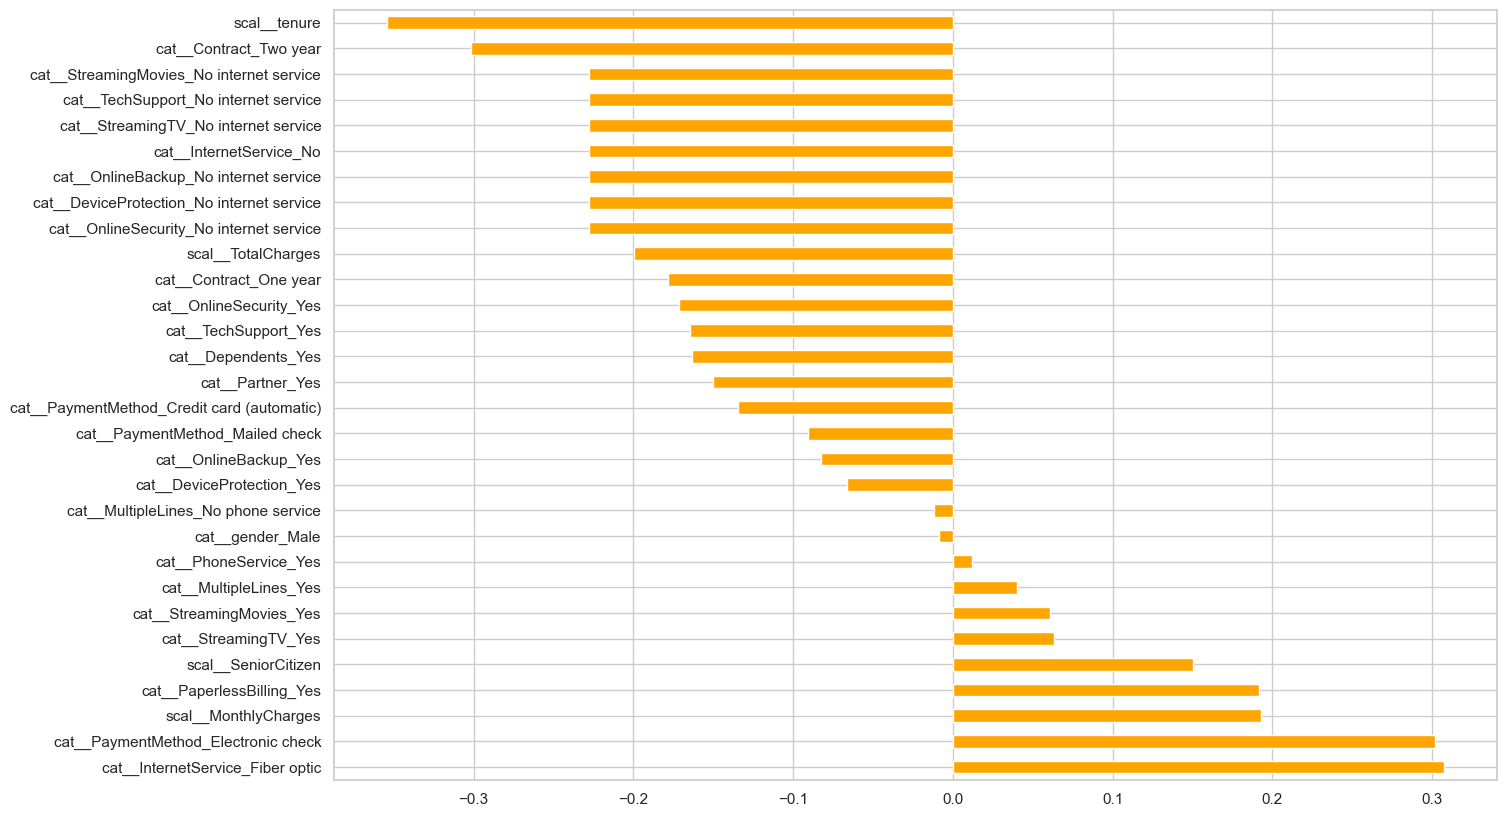

In [112]:
transformed.select_dtypes(include='number').corr()['Churn'].drop('Churn').sort_values(ascending=False).plot(kind='barh',color='orange',figsize=(15,10))
plt.show()

Show the distribution of some numerical features (after scaling) by Churn category (did the customer leave or not) using Box Plots

In [113]:
# Create the subplot grid: 2 rows, 2 columns
fig = sp.make_subplots(
    rows=2, cols=2, 
    subplot_titles=['MonthlyCharges vs Churn', 'tenure vs Churn', 'TotalCharges vs Churn', 'NumServices vs Churn'],
    vertical_spacing=0.1, horizontal_spacing=0.1
)

# Plot 1: MonthlyCharges vs Churn
fig.add_trace(
    go.Box(
        x=transformed['Churn'],
        y=transformed['scal__MonthlyCharges'],
        name='MonthlyCharges',
        boxmean='sd',
        marker_color='blue'
    ), row=1, col=1
)

# Plot 2: tenure vs Churn
fig.add_trace(
    go.Box(
        x=transformed['Churn'],
        y=transformed['scal__tenure'],
        name='tenure',
        boxmean='sd',
        marker_color='green'
    ), row=1, col=2
)

# Plot 3: TotalCharges vs Churn
fig.add_trace(
    go.Box(
        x=transformed['Churn'],
        y=transformed['scal__TotalCharges'],
        name='TotalCharges',
        boxmean='sd',
        marker_color='orange'
    ), row=2, col=1
)



fig.update_layout(
    title_text="Feature Distribution by Churn",
    showlegend=False, 
    height=800, 
    boxmode='group',  
    xaxis_title='Churn',
    yaxis_title='Feature Value',
    
)

# Show the plot
fig.show()


Interactive box plots were created to analyze the distribution of three key numerical characteristics by customer churn status. These plots showed clear differences in values ​​such as Monthly Charges and Tenure between churn and non-churn customers, enhancing our understanding of the relationship between these variables and customer behavior.

# Milestone 3: Machine Learning Model Development and Optimization

## Tasks
- Model Selection
+ Model Training
- Model Evaluation
+ Hyperparameter Tuning
- Model Comparison

## splitting data for training 
The data was split into a training and test set using train_test_split at an 80/20 ratio, with stratify ensuring a balanced distribution of Churn classes across both sets. This ensures a fair representation of classes during model training and evaluation.

In [114]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

Preprocessing was applied to the training and test data using a preprocessor object. This included scaling, encoding, and handling missing values. Transformations were learned from the training data only to ensure no information was leaked to the test set.

In [115]:
X_train_pre=preprocessor.fit_transform(X_train)
X_test_pre=preprocessor.transform(X_test)

## Model Selection

A Logistic Regression model is created with weights adjusted to compensate for differences in class size, ready for training using .fit()

In [116]:
lr=LogisticRegression(class_weight='balanced')

## Hyperparameter Tuning

Transaction tuning was performed using GridSearchCV for logistic regression, with a focus on optimizing the Recall metric to ensure we capture as many customers as possible who might otherwise leave.

In [117]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
log_gs = GridSearchCV(lr, param_grid, cv=5, scoring='recall')
log_gs.fit(X_train_pre, y_train)
print('Best score:', log_gs.best_estimator_)


Best score: LogisticRegression(C=1, class_weight='balanced')


In [118]:
best_lr=log_gs.best_estimator_
best_lr.fit(X_train_pre,y_train)

LogisticRegression(C=1, class_weight='balanced')

## Model Evaluation

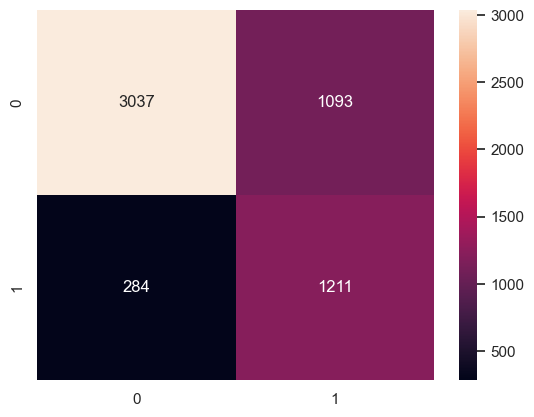

              precision    recall  f1-score   support

           0       0.91      0.74      0.82      4130
           1       0.53      0.81      0.64      1495

    accuracy                           0.76      5625
   macro avg       0.72      0.77      0.73      5625
weighted avg       0.81      0.76      0.77      5625



In [119]:
sns.heatmap(confusion_matrix(y_train,best_lr.predict(X_train_pre)),annot=True,fmt=".0f")
plt.show()
print(classification_report(y_train,best_lr.predict(X_train_pre)))

Precision: The accuracy of positive predictions.

Recall: The model's ability to find true positives (very important in Churn).

F1-score: The balance between precision and recall.

Support: The number of samples in each class.

## Feature Importance

A chart showing the most important characteristics that influence churn prediction. It can be used to understand customer behavior and target marketing campaigns based on these characteristics.

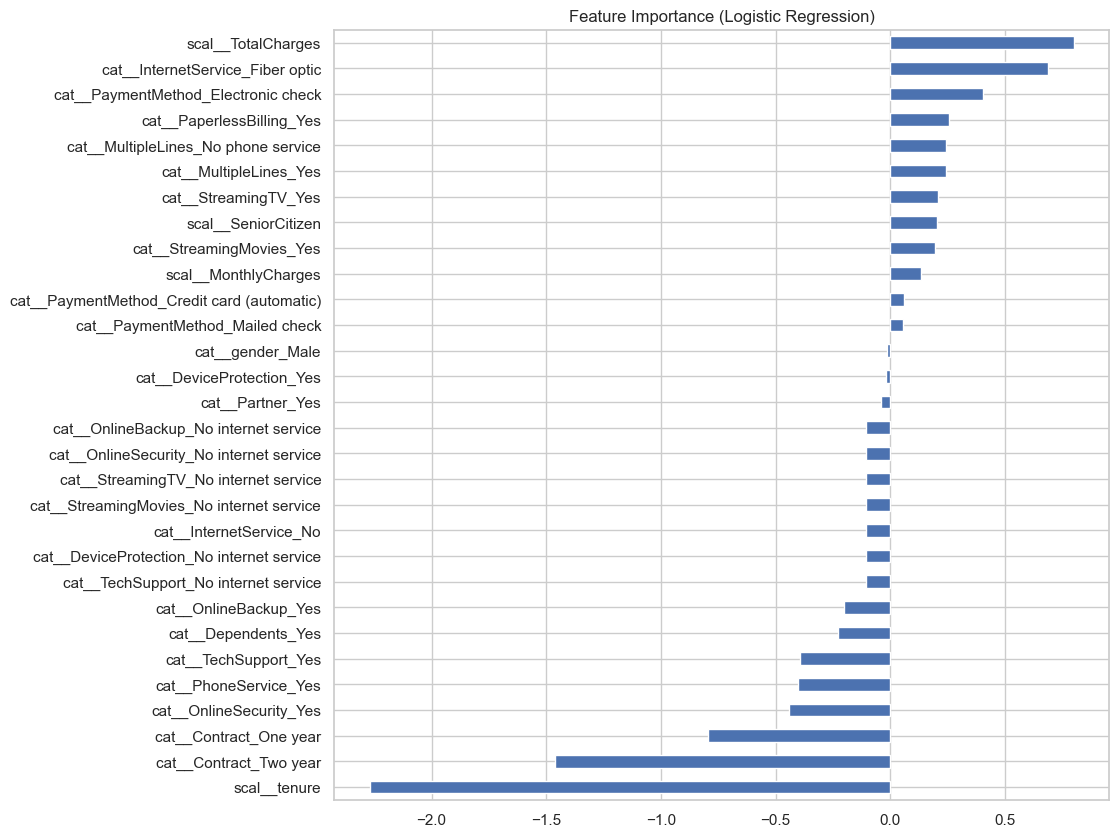

In [120]:
coef_df = pd.Series(best_lr.coef_[0], index=transformed.drop(columns='Churn').columns)
coef_df.sort_values().plot(kind='barh', title='Feature Importance (Logistic Regression)',figsize=(10,10))
plt.show()

Create a ready-to-train and evaluate SVC model on churn data.

In [121]:
svc = SVC(random_state=888, class_weight='balanced')

In [122]:
param_grid = {'C': [0.01, 0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf']}
svc_gs = GridSearchCV(svc, param_grid, cv=5, scoring='recall')
svc_gs.fit(X_train_pre, y_train)
print('Best Estimator:', svc_gs.best_estimator_)
print('Best score:', svc_gs.best_score_)


Best Estimator: SVC(C=0.01, class_weight='balanced', kernel='poly', random_state=888)
Best score: 0.8702341137123746


In [123]:
best_svc=svc_gs.best_estimator_
best_svc.fit(X_train_pre,y_train)

SVC(C=0.01, class_weight='balanced', kernel='poly', random_state=888)

              precision    recall  f1-score   support

           0       0.93      0.58      0.72      4130
           1       0.43      0.87      0.58      1495

    accuracy                           0.66      5625
   macro avg       0.68      0.73      0.65      5625
weighted avg       0.79      0.66      0.68      5625



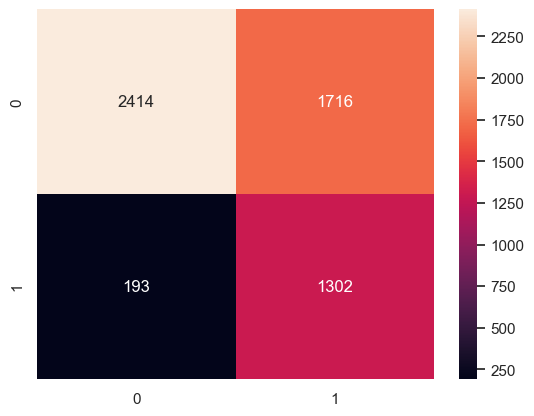

In [124]:
print(classification_report(y_train,best_svc.predict(X_train_pre)))
sns.heatmap(confusion_matrix(y_train,best_svc.predict(X_train_pre)),annot=True,fmt=".0f")
plt.show()

Random Forest was chosen as an additional classification model due to its high ability to handle non-linear and complex data, with weights adjusted to handle class imbalance in the departure data.

In [125]:
rf=RandomForestClassifier(random_state=42, class_weight='balanced')

In [126]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth': [5, 10, 20]
    }
rf_gs = GridSearchCV(rf, param_grid, cv=5, scoring='recall')
rf_gs.fit(X_train_pre, y_train)
print('Best Estimator:', rf_gs.best_estimator_)
print('Best score:', rf_gs.best_score_)

Best Estimator: RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=42)
Best score: 0.8080267558528428


In [127]:
best_rf=rf_gs.best_estimator_
best_rf.fit(X_train_pre,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=200,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      4130
           1       0.52      0.83      0.64      1495

    accuracy                           0.75      5625
   macro avg       0.72      0.78      0.73      5625
weighted avg       0.81      0.75      0.77      5625



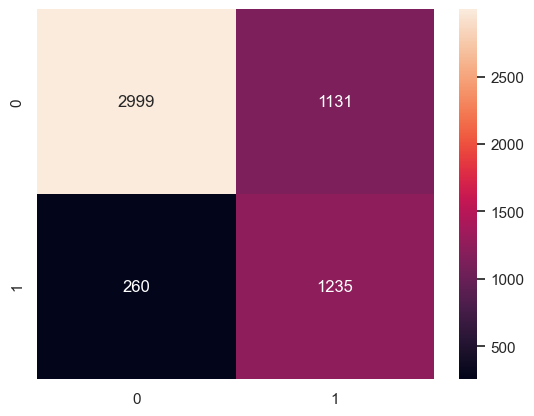

In [128]:
print(classification_report(y_train,best_rf.predict(X_train_pre)))
sns.heatmap(confusion_matrix(y_train,best_rf.predict(X_train_pre)),annot=True,fmt=".0f")
plt.show()


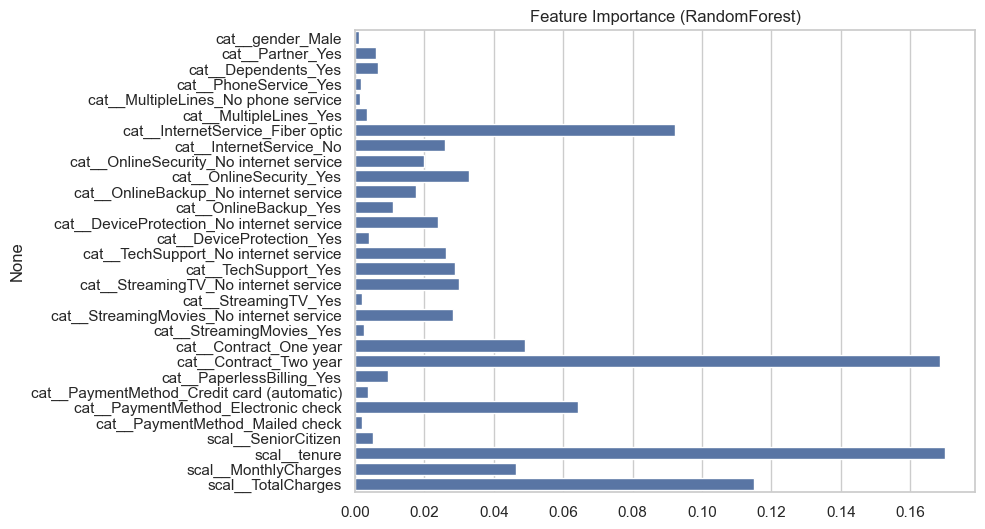

In [129]:
# Get feature importances
importances = best_rf.feature_importances_
feat_names = transformed.drop(columns='Churn').columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (RandomForest)")
plt.show()


In [130]:
neg, pos = np.bincount(y_train)
scale = neg / pos


Initialize an XGBoost model with weighted balancing to compensate for the imbalance between departing and non-departing customer classes.

In [131]:
xgb=XGBClassifier(random_state=42,scale_pos_weight=scale)

In [132]:
param_grid = {
    'n_estimators': [100, 200, 300],'alpha':[0.01,0.1,1,10,100]
    }
xgb_gs = GridSearchCV(xgb, param_grid, cv=5, scoring='recall')
xgb_gs.fit(X_train_pre, y_train)
print('Best score:', xgb_gs.best_score_)
print('Best estimator:', xgb_gs.best_estimator_)

Best score: 0.7779264214046824
Best estimator: XGBClassifier(alpha=100, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)


In [133]:
best_xgb=xgb_gs.best_estimator_
best_xgb.fit(X_train_pre,y_train)

XGBClassifier(alpha=100, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [134]:

print(classification_report(y_train,best_xgb.predict(X_train_pre)))
print(confusion_matrix(y_train,best_xgb.predict(X_train_pre)))

              precision    recall  f1-score   support

           0       0.92      0.75      0.82      4130
           1       0.54      0.82      0.65      1495

    accuracy                           0.77      5625
   macro avg       0.73      0.78      0.74      5625
weighted avg       0.82      0.77      0.78      5625

[[3081 1049]
 [ 269 1226]]


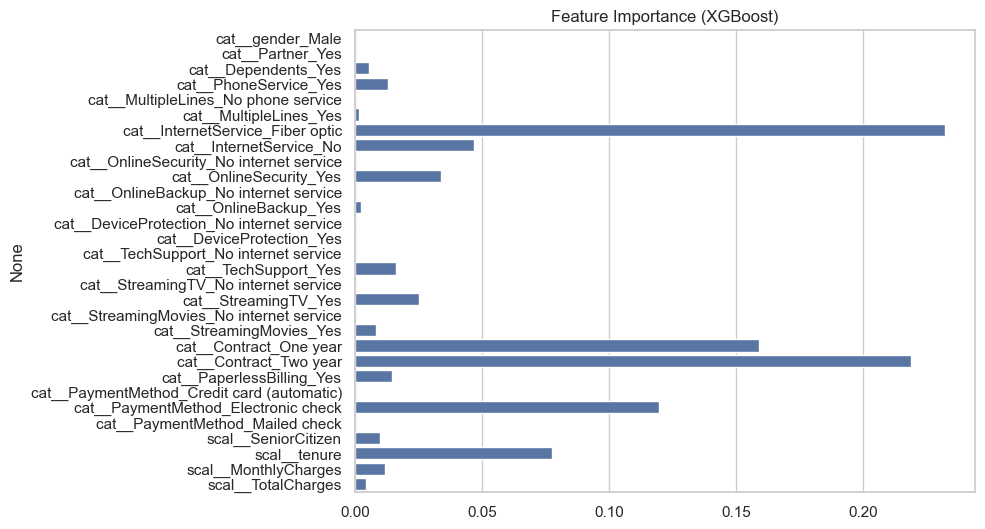

In [135]:
# Get feature importances
importances = best_xgb.feature_importances_
feat_names = transformed.drop(columns='Churn').columns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance (XGBoost)")
plt.show()


## final results
Table shows the performance evaluation of each model using the four metrics.
You can see which model offers the best balance between prediction accuracy and sensitivity in detecting departing customers.

In [136]:
col=['RandomForestClassifier','XGBoostClassifier','LogisticRegression','SVC']
result1=[accuracy_score(y_train,best_rf.predict(X_train_pre)),accuracy_score(y_train,best_xgb.predict(X_train_pre)),accuracy_score(y_train,best_lr.predict(X_train_pre)),accuracy_score(y_train,best_svc.predict(X_train_pre))]
result2=[recall_score(y_train,best_rf.predict(X_train_pre)),recall_score(y_train,best_xgb.predict(X_train_pre)),recall_score(y_train,best_lr.predict(X_train_pre)),recall_score(y_train,best_svc.predict(X_train_pre))]
result3=[f1_score(y_train,best_rf.predict(X_train_pre)),f1_score(y_train,best_xgb.predict(X_train_pre)),f1_score(y_train,best_lr.predict(X_train_pre)),f1_score(y_train,best_svc.predict(X_train_pre))]
result4=[ roc_auc_score(y_train,best_rf.predict(X_train_pre)), roc_auc_score(y_train,best_xgb.predict(X_train_pre)), roc_auc_score(y_train,best_lr.predict(X_train_pre)), roc_auc_score(y_train,best_svc.predict(X_train_pre))]
final = pd.DataFrame({'Algorithms':col,'Accuracy':result1,'Recall':result2,'F1':result3,'ROC_AUC':result4})
final

Algorithms  Accuracy    Recall        F1   ROC_AUC
0  RandomForestClassifier  0.752711  0.826087  0.639731  0.776119
1       XGBoostClassifier  0.765689  0.820067  0.650398  0.783036
2      LogisticRegression  0.755200  0.810033  0.637536  0.772692
3                     SVC  0.660622  0.870903  0.577000  0.727703

The performance of four different classification models (Random Forest, XGBoost, Logistic Regression, and SVC) was evaluated and compared using comprehensive metrics including precision, recall, F1-score, and ROC-AUC on the training data. This analysis helps select the best model based on the balance of performance in predicting the status of departing customers.

Interactive chart shows a comparison of model performance across different metrics, it's easy to see which model outperforms each metric.

In [137]:
final_melted = final.melt(id_vars='Algorithms', value_vars=['Accuracy', 'Recall', 'F1','ROC_AUC'], var_name='Metric', value_name='Score')
fig = px.line(final_melted, x='Algorithms', y='Score', color='Metric', markers=True, title='Model Performance Comparison', labels={'Score': 'Metric Score', 'Algorithms': 'Model'})
fig.show()

The four final models were evaluated on the test dataset using classification reports and confusion matrices. These results provide a clear view of each model's performance in predicting the status of departing customers while ensuring that the model does not make significant errors on new data.

In [138]:
print(classification_report(y_test,best_xgb.predict(X_test_pre)))
print(confusion_matrix(y_test,best_xgb.predict(X_test_pre)))
print(classification_report(y_test,best_rf.predict(X_test_pre)))
print(confusion_matrix(y_test,best_rf.predict(X_test_pre)))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1033
           1       0.52      0.81      0.63       374

    accuracy                           0.75      1407
   macro avg       0.72      0.77      0.72      1407
weighted avg       0.81      0.75      0.76      1407

[[748 285]
 [ 70 304]]
              precision    recall  f1-score   support

           0       0.91      0.69      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.72      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.72      0.74      1407

[[715 318]
 [ 72 302]]


In [139]:
print(classification_report(y_test,best_lr.predict(X_test_pre)))
print(confusion_matrix(y_test,best_lr.predict(X_test_pre)))
print(classification_report(y_test,best_svc.predict(X_test_pre)))
print(confusion_matrix(y_test,best_svc.predict(X_test_pre)))

              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1033
           1       0.49      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407

[[728 305]
 [ 77 297]]
              precision    recall  f1-score   support

           0       0.92      0.57      0.70      1033
           1       0.42      0.86      0.56       374

    accuracy                           0.64      1407
   macro avg       0.67      0.71      0.63      1407
weighted avg       0.78      0.64      0.66      1407

[[586 447]
 [ 54 320]]


### Precision-Recall Curve Visualization

In [140]:
from sklearn.metrics import precision_recall_curve


y_score = best_rf.predict_proba(X_train_pre)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_train, y_score)

# Pad thresholds to match precision/recall length
thresholds = list(thresholds) + [1.0]

pr_df = pd.DataFrame({
    "recall": recall,
    "precision": precision,
    "threshold": thresholds
})

px.line(pr_df, x="recall", y="precision", hover_data=["threshold"], title="Precision-Recall Curve").show()

The precision versus recall curve for the Random Forest model is plotted using prediction probabilities on the training data. This curve helps understand how the choice of decision threshold affects the balance of model precision and recall, which is important for improving the detection of customers at risk of churn.

###  ROC Curve Visualization

The ROC curve helps evaluate the model's performance in distinguishing between customers who will leave and those who will stay, and is used to choose the best decision threshold.

In [141]:
# Get predicted probabilities for the positive class
y_proba = best_rf.predict_proba(X_train_pre)[:, 1]

# Calculate FPR, TPR, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_proba)

# Create DataFrame for plotting
roc_df = pd.DataFrame({
    "fpr": fpr,
    "tpr": tpr,
    "threshold": thresholds.tolist() + [None]*(len(fpr)-len(thresholds))
})

# Plot ROC curve using Plotly Express
px.line(roc_df, x="fpr", y="tpr", hover_data=["threshold"], title="ROC Curve (Random Forest)").show()

+ Threshold Optimization: Youden's J statistic

Youden's J statistic was used to select the optimal threshold on the ROC curve of the model, which contributes to improving the accuracy of forecasting departure customers by achieving a balance between correct detection and reducing false alarms.

In [142]:
# Calculate Youden's J statistic
j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

print(f"Best threshold (Youden's J): {best_threshold:.3f}")

Best threshold (Youden's J): 0.477


## Saving the Model and Threshold

In [143]:
model_pip=Pipeline([
    ('preprocesed',preprocessor),
    ('model',best_rf)
])


In [144]:
with open("model_with_pip.pkl", "wb") as f:
    pickle.dump(model_pip, f)

In [145]:
data_to_save = {
    "model": model_pip,
    "threshold": best_threshold
}

with open("model_with_threshold.pkl", "wb") as f:
    pickle.dump(data_to_save, f)

The trained model with the optimal threshold is saved in a pickle file for easy deployment and subsequent use in live customer prediction with an improved decision threshold.

The model_with_threshold.pkl file contains both the Random Forest model and the optimal threshold, ready for use in a production environment or at later stages of the project.

# Conclusion

In this project, we successfully developed a machine learning pipeline to predict customer churn using a Telco dataset. We started with comprehensive data collection, cleaning, and exploratory data analysis to understand the key factors influencing churn. Through advanced feature engineering and selection, we enhanced the model’s ability to capture important patterns.

Several classification algorithms, including Logistic Regression, Random Forest, XGBoost, and SVC, were trained and evaluated. Among them, the Random Forest model showed superior performance based on recall, F1-score, and ROC-AUC metrics. We further optimized the decision threshold using Youden's J statistic to balance sensitivity and specificity.

The final model, along with the optimized threshold, was saved for deployment purposes, enabling the company to identify at-risk customers accurately and take proactive retention measures.

This approach demonstrates the effectiveness of data-driven techniques in reducing customer churn, thereby improving business sustainability and customer satisfaction.

